In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random
p = 0.5
pricing = pd.read_csv(
         'data/retailer_pricing.csv',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
# pricing.to_csv('data/sampled_retailer_pricing.csv')
pricing.head(3)

/Users/peterwang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,store,title,sku,groupid,brand,color,sizing,category,subcategory,price,date
0,0,Stokke Baby Set for Tripp Trapp® Chair,B07KQPMHYH,5772084,STOKKE,plum purple,one size,Baby Accessories,Baby Furniture,69.0,20190801
1,0,Brochu Walker Johan High/Low Cotton Sweater,B07Q1KSHXD,5811666,BROCHU WALKER,aster,medium,Tops,Sweater,256.8,20190801
2,0,johnnie-o Tahoe Fleece Vest,B07J12JGL6,5420223,JOHNNIE-O,_no_variant_,xx-large,Outerwear,Vest,120.0,20190801


In [3]:
nke = pd.read_csv('data/stocks/NKE.csv')
nke['Date'] = pd.to_datetime(nke['Date'])
nke.set_index('Date')

amzn = pd.read_csv('data/stocks/AMZN.csv')
amzn['Date'] = pd.to_datetime(amzn['Date'])
amzn.set_index('Date')
amzn.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-19,1753.510010,1784.160034,1753.510010,1761.849976,1761.849976,6364200
1,2019-03-20,1769.939941,1799.500000,1767.030029,1797.270020,1797.270020,6265600
2,2019-03-21,1796.260010,1823.750000,1787.280029,1819.260010,1819.260010,5767800


In [10]:
pricing['date'] = pd.to_datetime(pricing['date'], format='%Y%m%d')

In [11]:
nike_prices = pricing.loc[pricing.brand == 'NIKE']
top_ten_groupids = nike_prices['groupid'].value_counts()[:10]

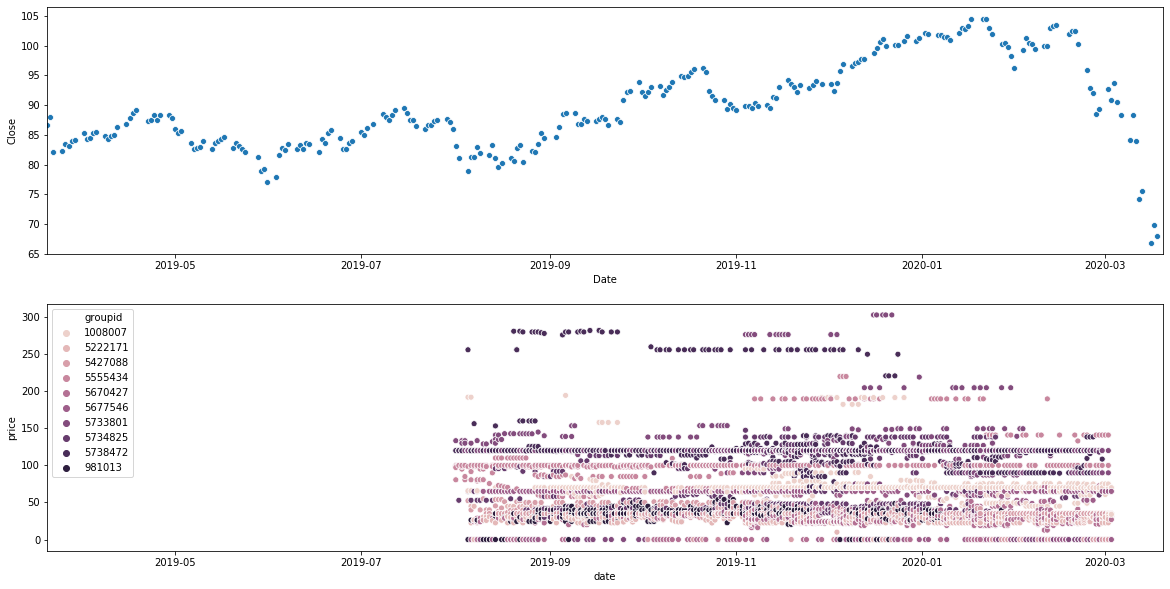

In [12]:
import datetime
import seaborn as sns
nprices = nike_prices.loc[nike_prices['groupid'].isin([v for v, _ in top_ten_groupids.items()])]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
ax1.set_xlim([datetime.date(2019, 3, 20), datetime.date(2020, 3, 20)])
ax2.set_xlim([datetime.date(2019, 3, 20), datetime.date(2020, 3, 20)])
sns.scatterplot(x=nke['Date'], y=nke['Close'], ax=ax1)
sns.scatterplot(x='date', y='price', ax=ax2, hue='groupid',palette=sns.cubehelix_palette(10), data=nprices)


In [13]:
amazon_pricing = pricing.loc[pricing['store'] == 0]

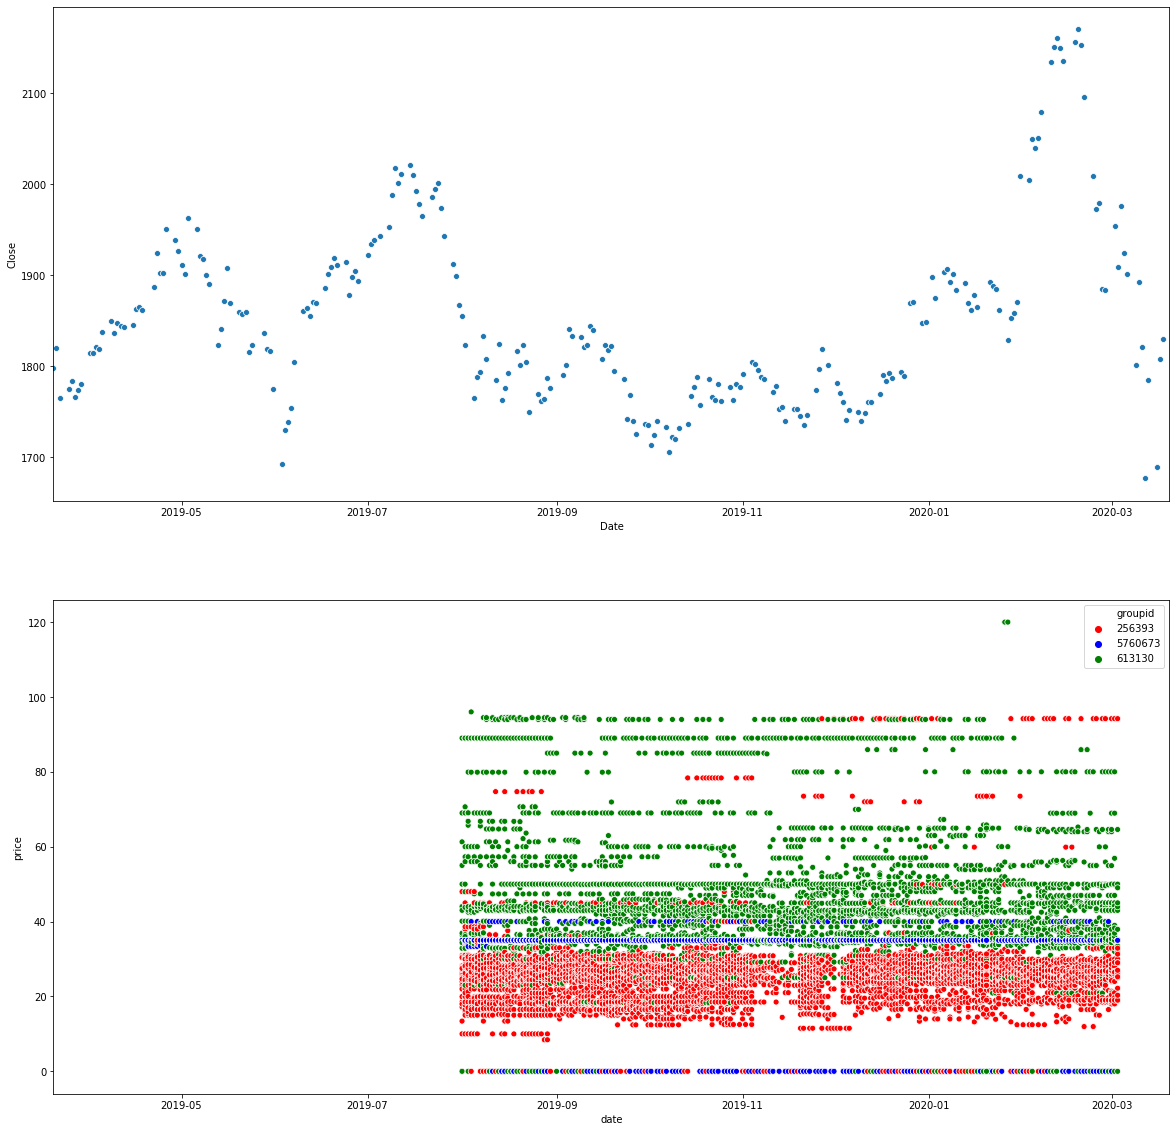

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
ax1.set_xlim([datetime.date(2019, 3, 20), datetime.date(2020, 3, 20)])
ax2.set_xlim([datetime.date(2019, 3, 20), datetime.date(2020, 3, 20)])
sns.scatterplot(x=amzn['Date'], y=amzn['Close'], ax=ax1)
b1 = amazon_pricing.loc[amazon_pricing['brand'].isin([brand for brand, _ in amazon_pricing['brand'].value_counts()[:1].items()])]
b2 = amazon_pricing.loc[amazon_pricing['groupid'].isin([gid for gid, _ in amazon_pricing['groupid'].value_counts()[:3].items()])]
sns.scatterplot(x='date', y='price', hue='groupid',palette=["r", "b", "g"], data=b2, ax=ax2)